# Compositional analysis

In [1]:
# 使用back环境

# import matplotlib.pyplot as plt
import mudata as mu  # 不加载这个凉凉，而且没有任何提示

import pertpy as pt

In [2]:
"""
冲突太多了，使用新环境解决,
tensorflow用conda安装,
pertpy用pip需要jax==0.4.13，报错用谷歌
"""

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 设置参数
import matplotlib as mpl

mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [4]:
adata = sc.read("./anndata_manual_anno.h5ad")

In [5]:
ANNO_COL = "manual_celltype_annotation"

In [6]:
adata.obs["sample"].unique()

['GSM6685496', 'GSM6685497', 'GSM6685498', 'GSM6685499', 'GSM6685500', ..., 'GSM6685524', 'GSM6685525', 'GSM6685526', 'GSM6685527', 'GSM6685528']
Length: 33
Categories (33, object): ['GSM6685496', 'GSM6685497', 'GSM6685498', 'GSM6685499', ..., 'GSM6685525', 'GSM6685526', 'GSM6685527', 'GSM6685528']

In [7]:
# adata.obs["group"] = adata.obs["organs"]
# adata.obs["sample"] = adata.obs["orig.ident"]

In [8]:
""" 
在分析细胞计数数据的成分变化时，需要考虑多种技术和方法学限制。
    - 一项挑战是实验重复次数较少，这会导致在使用频率统计检验进行差异丰度分析时出现较大的置信区间。
    - 重要的是所有特征（在我们的例子中为细胞类型）的相对丰度总和为 1。
    - 由于这种总和为一的限制，导致细胞类型丰度之间存在负相关。
--------------------------------
scCODA属于需要预定义簇（最常见的细胞类型）来统计得出成分变化的工具系列
--------------------------------
它使用分层狄利克雷多项式模型对细胞类型计数进行建模，
    - 该模型通过对所有测量的细胞类型比例进行联合建模来解释细胞类型比例的不确定性和负相关偏差。
    - 为了确保唯一可识别的解决方案和易于解释，scCODA 中的参考被选择为特定的细胞类型。
因此，scCODA 检测到的任何成分变化始终必须相对于所选参考进行查看。
--------------------------------
scCODA 可以自动选择适当的细胞类型作为参考，设置 reference_cell_type = "automatic"
该细胞类型在所有样品中具有几乎恒定的相对丰度，
也可以使用用户指定的参考细胞类型运行。
--------------------------------
局限性：
    然而，scCODA 假设协变量和细胞丰度之间存在对数线性关系，这在使用连续协变量时可能并不总是反映潜在的生物过程。
    scCODA 的另一个限制是无法推断除成分效应之外的细胞成分之间的相关结构。
    此外，scCODA 仅模拟平均丰度的变化，但不检测响应变异性的变化
--------------------------------

"""

sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",  #
    generate_sample_level=True,
    cell_type_identifier=ANNO_COL,
    sample_identifier="sample",
    covariate_obs=["group"],
)
sccoda_data

MuData object with n_obs × n_vars = 100476 × 2011
  var:	'n_cells'
  2 modalities
    rna:	100443 x 2000
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'leiden_00_25', 'leiden_00_5', 'manual_celltype_annotation', 'scCODA_sample_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'dendrogram_leiden_2', 'group_colors', 'hvg', 'ident_colors', 'leiden', 'leiden_00_25', 'leiden_00_25_colors', 'leiden_00_5', 'leiden_00_5_colors', 'leiden_0_25', 'leiden_0_25_colors', 'leiden_0_5', 'leiden_0_5_colors', 'leiden_2', 'leiden_2_colors', 'leiden_colors', 'manual_celltype_annotation_colors', 'neighbors', 'pca', 'scrublet', 'umap'
      obsm:	'HARMONY', 'PCA', 'UMAP', 'X_pca', 'X_scVI', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'logcounts', 'scaledata', 'scran_normalization', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    coda:	33 x 11
      obs:	'group', 'sample'
      var:	'n_cells'

To get an overview of the cell type distributions across conditions we can use scCODA's `boxplots`. To get an even better understanding of how the data is distributed, the red dots show the actual data points.

In [9]:
sccoda_data["coda"].obs["group"].unique()

['Disorder', 'Normal']
Categories (2, object): ['Disorder', 'Normal']

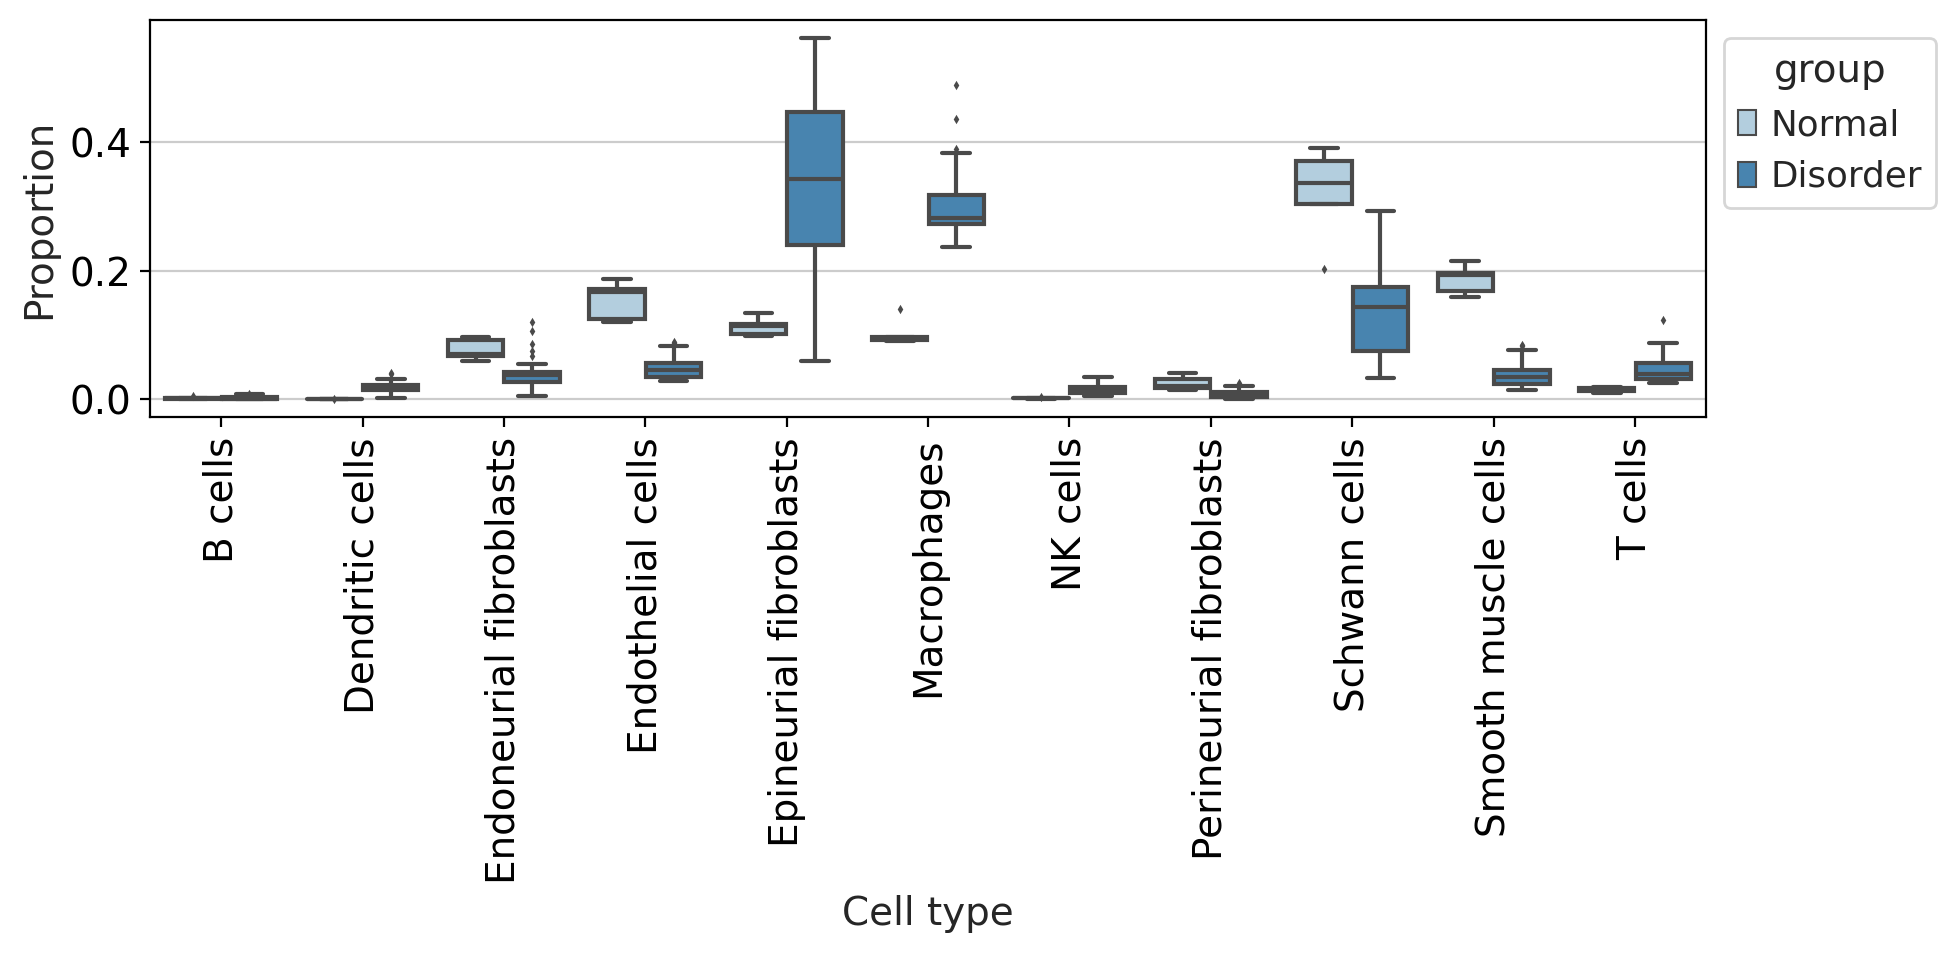

In [10]:
""" 
为了更好地了解数据的分布方式，红点显示实际的数据点。使用 scCODA 的boxplots.
必须正确评估这些差异是否具有统计显着性。
--------------------------------
这个流程需要排下序，和R一样默认参考组是第一个
--------------------------------
level_order=["Non-diabetic", "Diabetic"],

"""
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="group",
    figsize=(10, 5),
    # add_dots=True,
    # y_scale="log",
    args_swarmplot={"palette": ["red"]},
    level_order=["Normal", "Disorder"],
)
# pdf
plt.savefig("figures/15-coda_boxplots.pdf")
plt.show()

The boxplots highlight some differences in the distributions of the cell types. Clearly noticable is the high proportion of enterocytes for the Salmonella condition. But other cell types such as transit-amplifying (TA) cells also show stark differences in abundance for the Salmonella condition compared to control. Whether any of these differences are statistically significant has to be properly evaluated.

An alternative visualization is a stacked barplot as provided by scCODA. This visualization nicely displays the characteristics of compositional data: If we compare the Control and Salmonella groups, we can see that the proportion of Enterocytes greatly increases in the infected mice. Since the data is proportional, this leads to a decreased share of all other cell types to fulfil the sum-to-one constraint.

In [11]:
import seaborn as sns

In [12]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

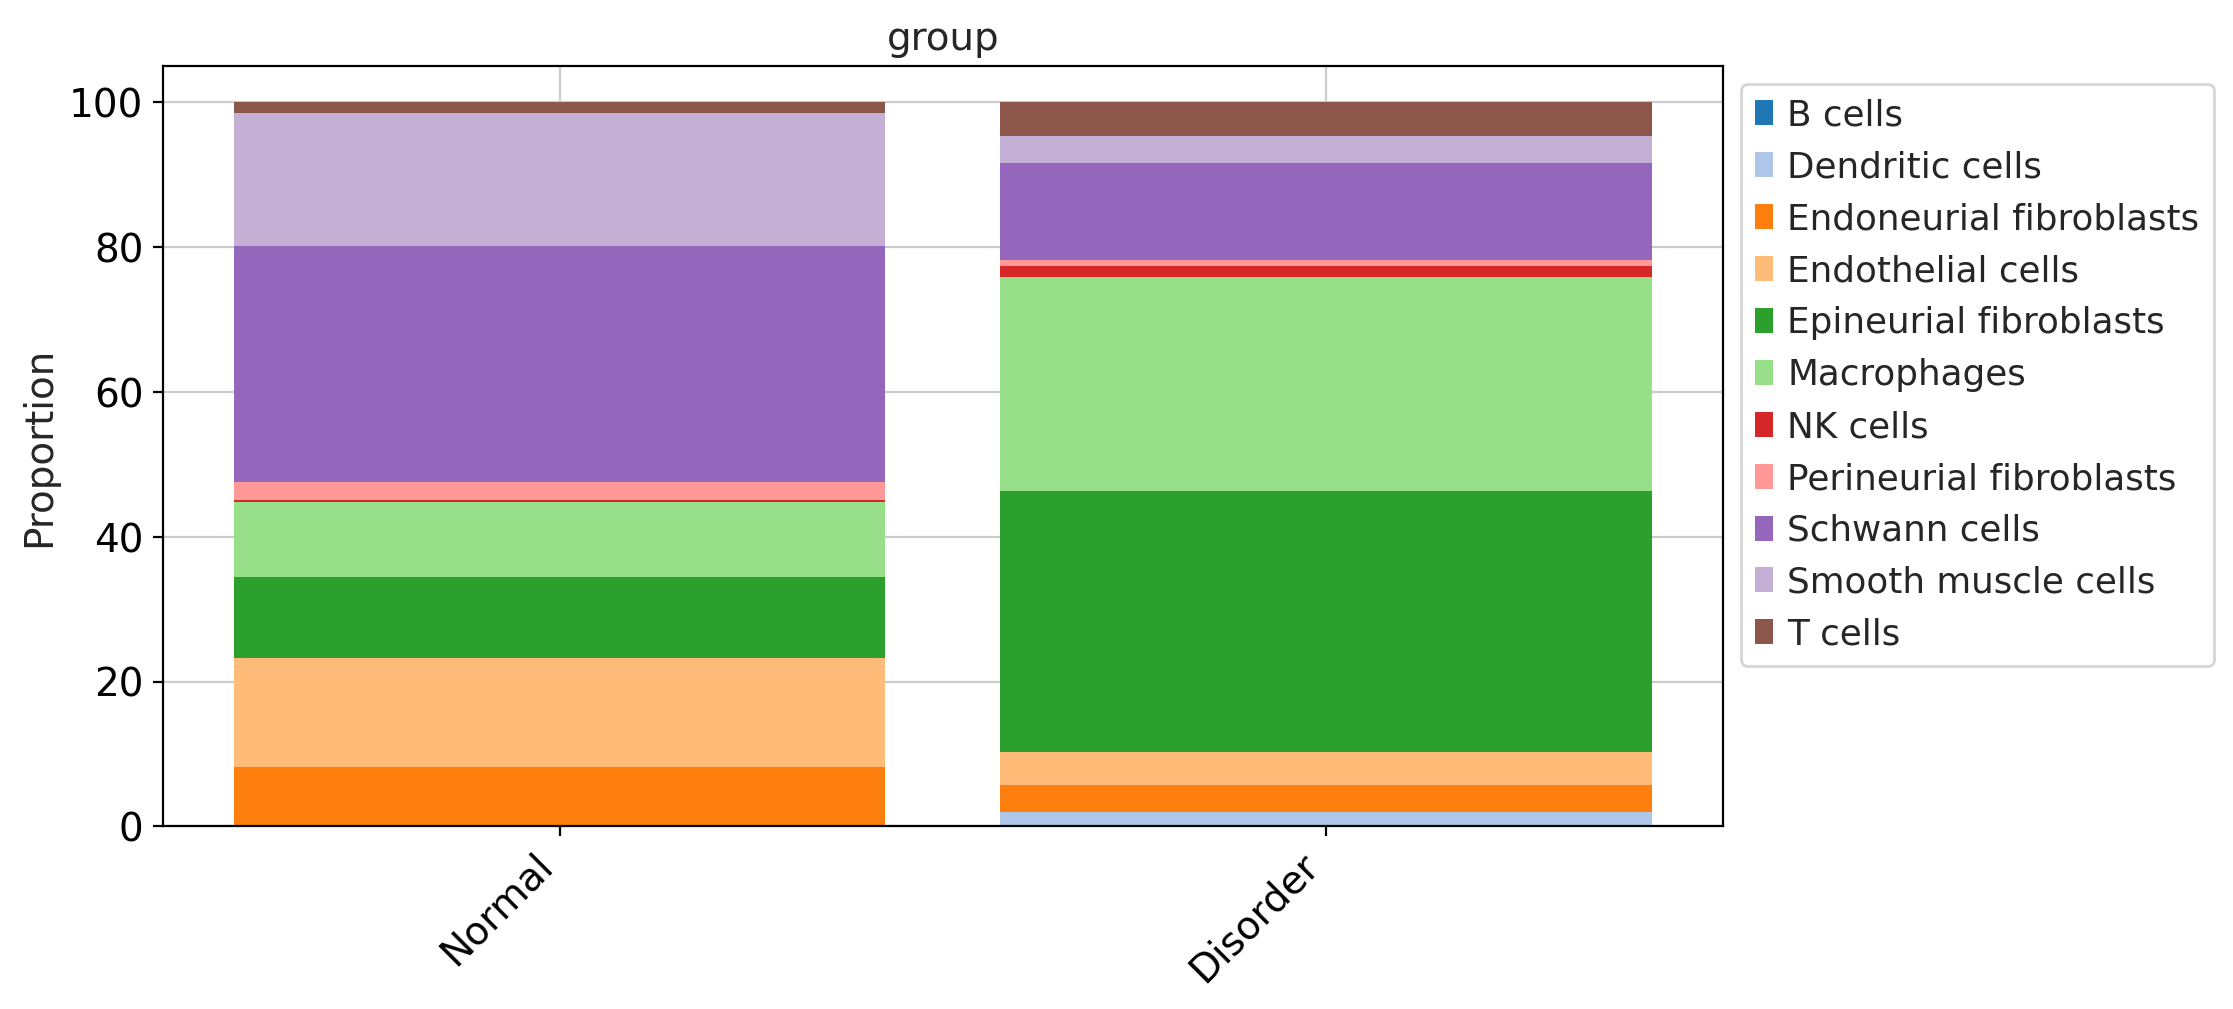

In [13]:
pt.pl.coda.stacked_barplot(
    sccoda_data,
    modality_key="coda",
    feature_name="group",
    figsize=(10, 5),
    level_order=["Normal", "Disorder"],
)
plt.savefig("figures/15-coda_stacked_barplot.pdf")
plt.show()

<Axes: xlabel='Presence', ylabel='Total dispersion'>

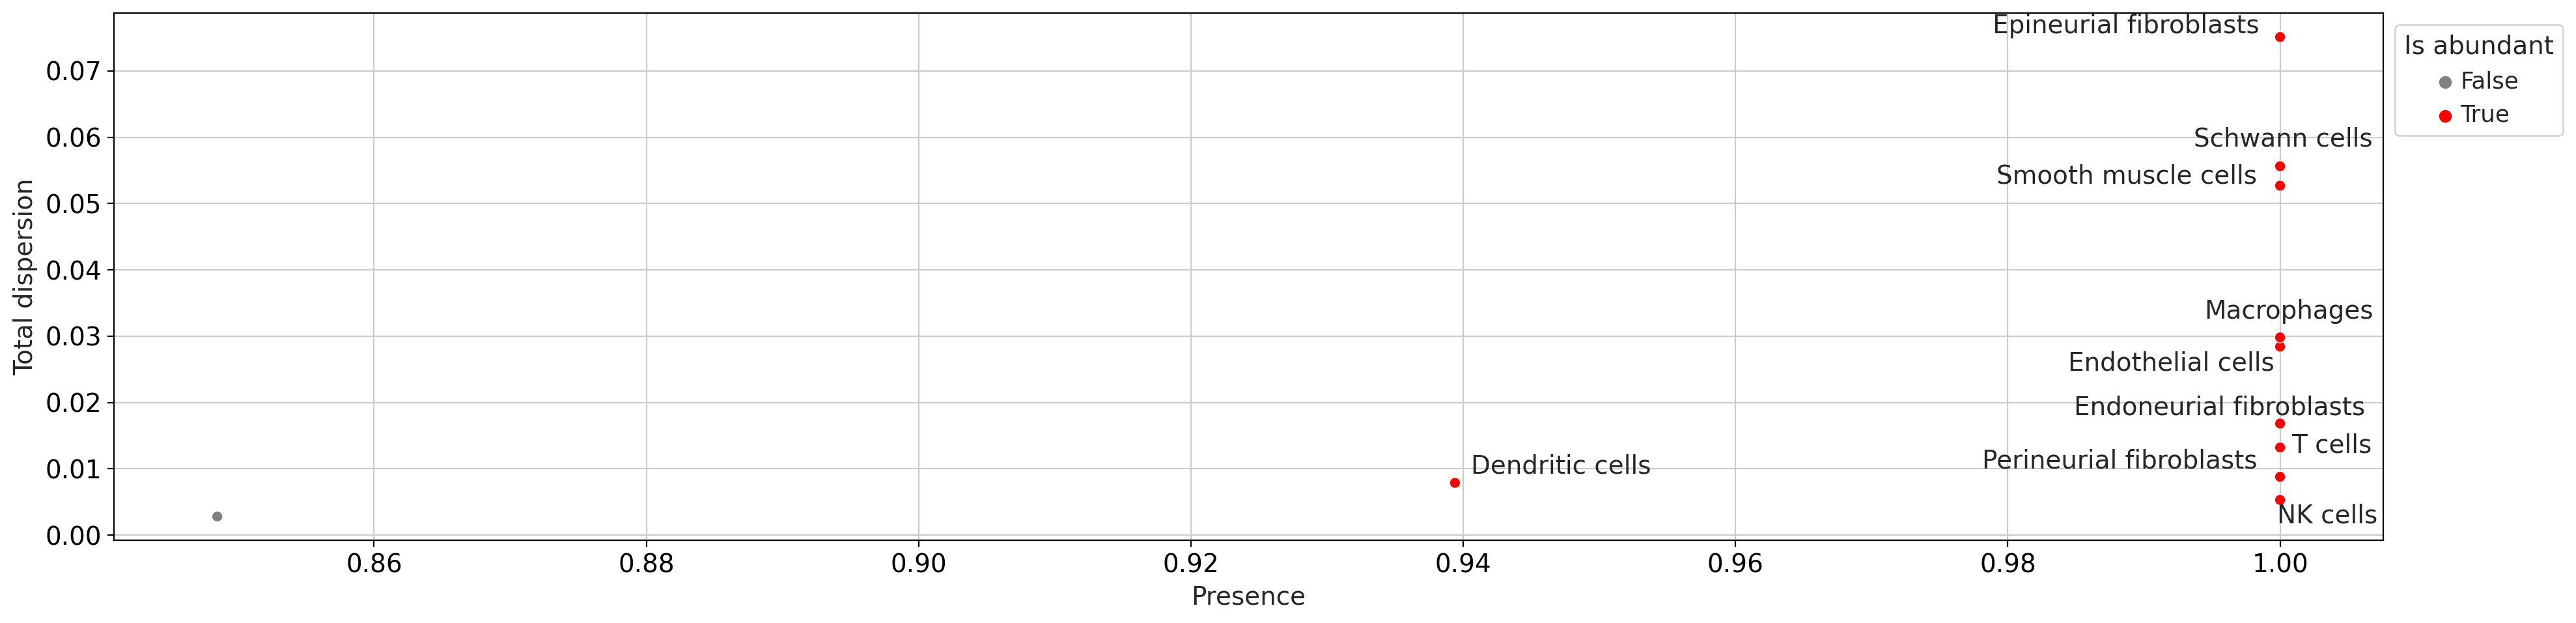

In [18]:
"""
查找参考细胞类型
scCODA 模型要求将一种细胞类型设置为参考类别。
一个好的首选是参考细胞类型，它可以紧密保留成分分析过程中相对丰度的变化。
参考细胞类型不应稀有，以避免绝对变化较小而导致相对变化较大。
此外，参考细胞的相对丰度在所有样本中的差异应尽可能小。
"""

pt.pl.coda.rel_abundance_dispersion_plot(
    sccoda_data,
    modality_key="coda",
    abundant_threshold=0.9,
    figsize=(20, 5),
)

In [19]:
"""
因为从视觉上看它们的丰度似乎相当恒定。
手动设置参考细胞类型的另一种方
默认情况下，分类变量通过全秩处理编码进行编码。因此，数据集中第一个样本的值用作默认（控制）类别。
我们可以通过将R模型公式更改为来选择默认级别："C(<CovariateName>, Treatment('<ReferenceLevelName>'))"
"""

sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="C(group, Treatment('Normal'))",
    # reference_cell_type="B cells",
)

# 运行 NUTS 采样，进行贝叶斯推断
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=123)

Automatic reference selection! Reference cell type set to NK cells

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [03:48<00:00, 48.12it/s, 767 steps of size 1.06e-02. acc. prob=0.84] 


In [20]:
sccoda_data["coda"].varm

AxisArrays with keys: intercept_df, effect_df_C(group, Treatment('Normal'))[T.Disorder]

HDI 3% 和 HDI 97%（最高密度区间）: 这两个值提供了参数估计的可信区间（Credible Interval）。

HDI的3%和97%点分别代表可信区间的下限和上限。如果可信区间不包含0，则该细胞类型的丰度变化具有统计显著性。

Final Parameter 不为0就显著

In [21]:
sccoda_data["coda"].varm["effect_df_C(group, Treatment('Normal'))[T.Disorder]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B cells,0.000000,-1.076,0.538,0.262,0.3184,22.377152,1.536116
Dendritic cells,1.200413,0.309,2.146,0.510,0.9652,72.200963,3.267946
Endoneurial fibroblasts,-1.666364,-2.075,-1.259,0.204,1.0000,129.240712,-0.867939
Endothelial cells,-2.108424,-2.443,-1.778,0.171,1.0000,163.795095,-1.505697
Epineurial fibroblasts,0.000000,-0.378,0.188,0.077,0.1940,970.722305,1.536116
Macrophages,0.000000,-0.292,0.338,0.063,0.1503,929.865953,1.536116
NK cells,0.000000,0.000,0.000,0.000,0.0000,60.282415,1.536116
Perineurial fibroblasts,-1.706349,-2.288,-1.074,0.306,1.0000,38.539813,-0.925625
Schwann cells,-2.005003,-2.259,-1.713,0.139,1.0000,374.666805,-1.356493


In [22]:
sccoda_data["coda"].varm["effect_df_C(group, Treatment('Normal'))[T.Disorder]"].to_csv("./table/CODA-result.csv")

In [23]:
""" 
scCODA 根据包含概率选择可信效应。可信效应和不可信效应之间的界限取决于所需的错误发现率 (FDR)。
较小的 FDR 值会产生更保守的结果，但可能会遗漏一些效应，而较大的 FDR 值会选择更多的效应，但会产生更多的错误发现。
默认情况下，该值为 0.05。由于根据数据集的不同，FDR 可能会对结果产生重大影响，
因此我们建议尝试高达 0.2 的不同 FDR，以获得最显着的效果。
"""

sccoda_model.set_fdr(sccoda_data, 0.05, modality_key="coda")  # 0.2

To get the binary classification of compositional changes per cell type we use the `credible_effects` function of scCODA on the result object. Every cell type labeled as "True" is significantly more or less present. The fold-changes describe whether the cell type is more or less present. Hence, we will plot them alongside the binary classification below.

In [24]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 33 × 11
    obs: 'group', 'sample'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', "effect_df_C(group, Treatment('Normal'))[T.Disorder]"

In [25]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate                                  Cell Type              
C(group, Treatment('Normal'))[T.Disorder]  B cells                    False
                                           Dendritic cells             True
                                           Endoneurial fibroblasts     True
                                           Endothelial cells           True
                                           Epineurial fibroblasts     False
                                           Macrophages                False
                                           NK cells                   False
                                           Perineurial fibroblasts     True
                                           Schwann cells               True
                                           Smooth muscle cells         True
                                           T cells                    False
Name: Final Parameter, dtype: bool

In [26]:
sccoda_model.summary(sccoda_data)

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 33 samples, 11 cell types                                    │
│ Reference cell type                        │ NK cells                                                           │
│ Formula                                    │ C(group, Treatment('Normal'))                                      │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                          Final Parameter  Expected Sample                                                       │
│ Cell Type                                                                                                       │
│ B cells                      -0.938            7.716                                                            │
│ Dendritic cells              -0.967            7.495                                                            │
│ Endoneurial fibroblasts       2.482          235.871                                                            │
│ Endothelial cells             3.161          465.116                                                            │
│ Epineurial fibroblasts        2.832          334.717                                                            │
│ Macrophages                   2.789          320.629                                                            │
│ NK cells                      0.053           20.786                                                            │
│ Perineurial fibroblasts       1.312           73.207                                                            │
│ Schwann cells                 3.885          959.379                                                            │
│ Smooth muscle cells           3.358          566.392                                                            │
│ T cells                       0.980           52.525                                                            │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                  Final Parameter  Expected Sample  log2-fold    │
│ change                                                                                                          │
│ Covariate                               Cell Type                                                               │
│ C(group, Treatment('Normal'))T.Disorder B cells                       0.000           22.377             1.536  │
│                                         Dendritic cells               1.200           72.201             3.268  │
│                                         Endoneurial fibroblasts      -1.666          129.241            -0.868  │
│                                         Endothelial cells            -2.108          163.795            -1.506  │
│                                         Epineurial fibroblasts        0.000          970.722             1.536  │
│                                         Macrophages                   0.000          929.866             1.536  │
│                                         NK cells                      0.000           60.282             1.536  │
│                                         Perineurial fibroblasts      -1.706           38.540            -0.926  │
│                                         Schwann cells                -2.005          374.667            -1.356  │
│                                         Smooth muscle cells          -2.538          129.813            -2.125  │
│                                         T cells                       0.000          152.329             1.536  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

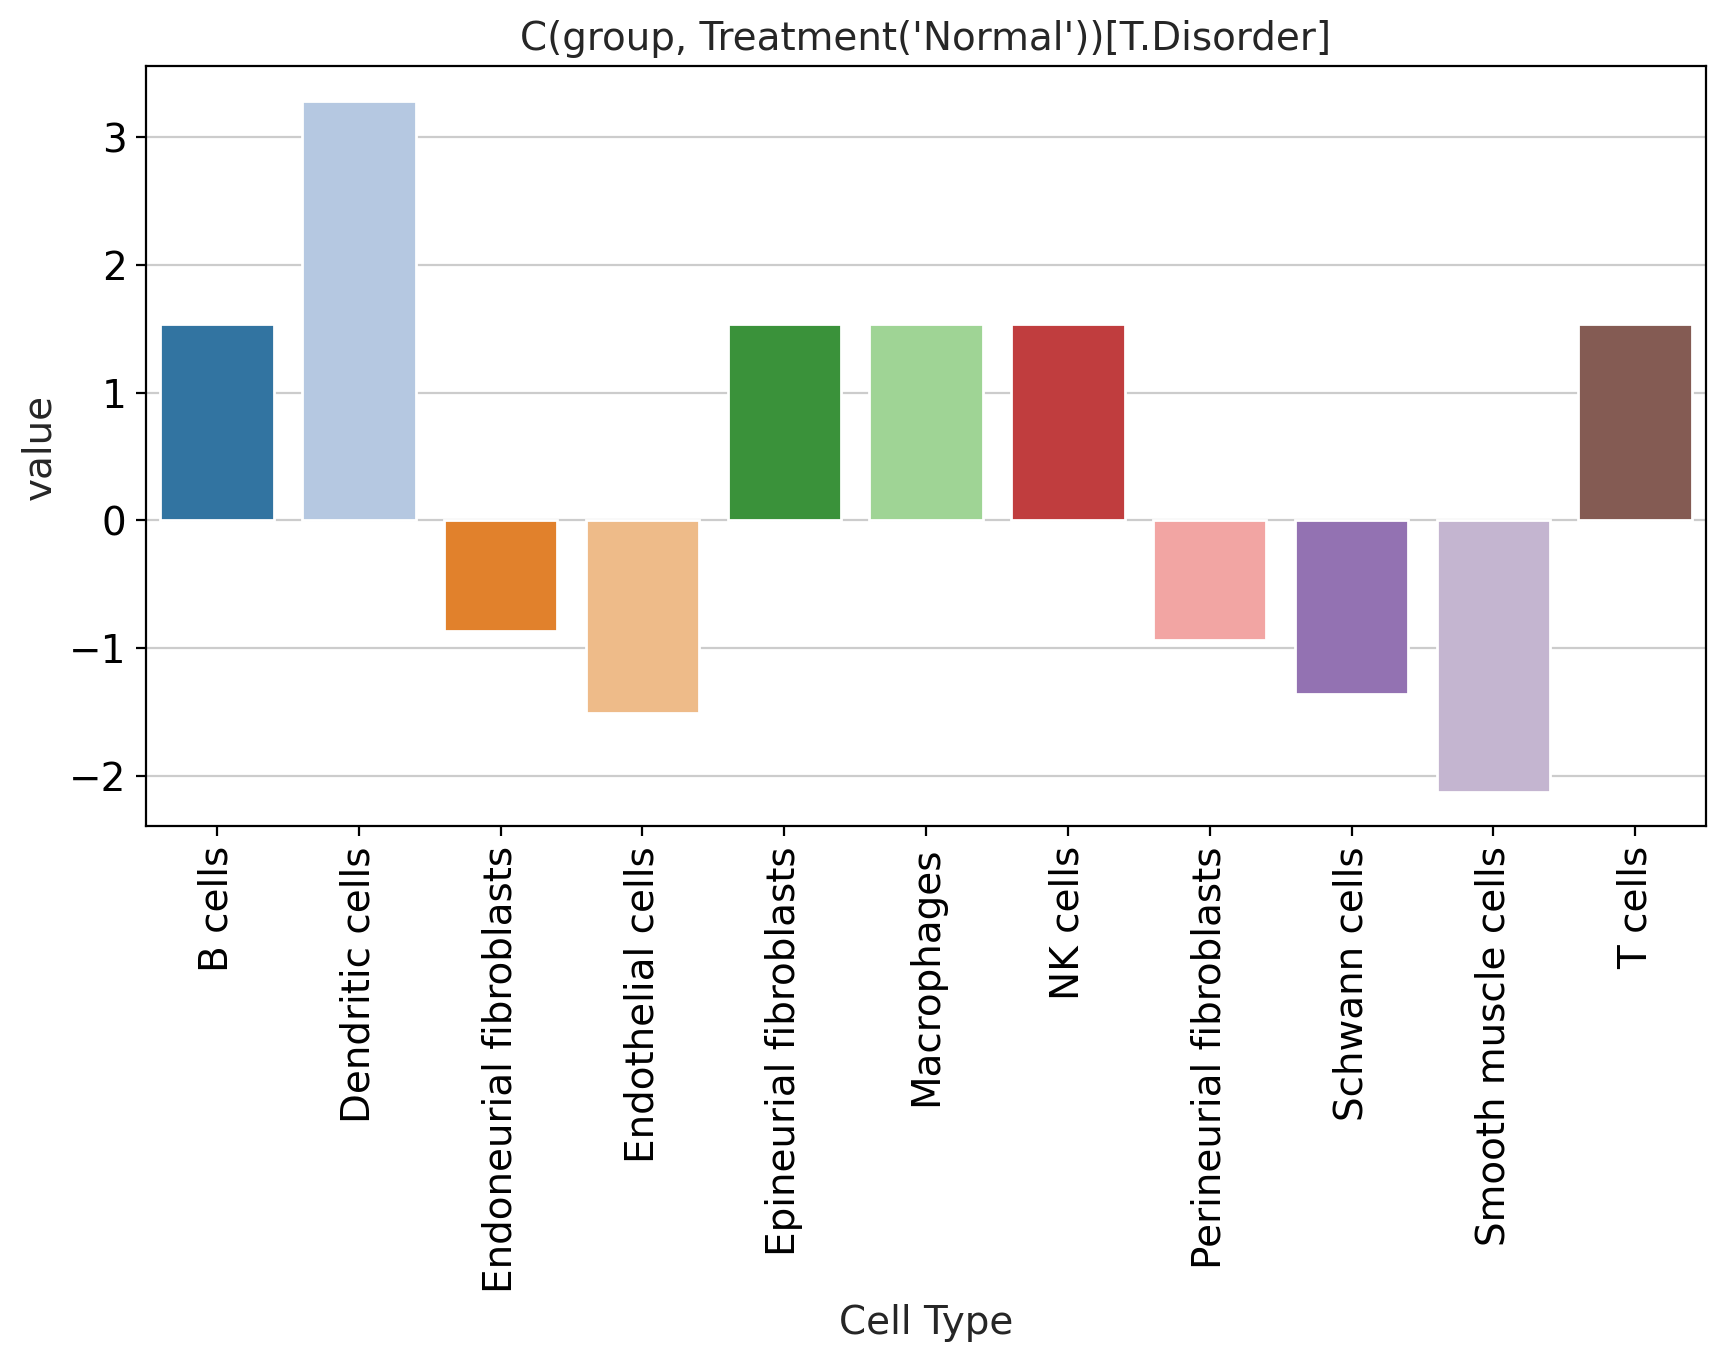

In [59]:
pt.pl.coda.effects_barplot(
    sccoda_data,
    "coda",
    "group",
    plot_facets=False,
    parameter="log2-fold change",
    plot_zero_covariate=False,
    plot_zero_cell_type=False,
    figsize=(10, 5),
    level_order=["Normal", "Disorder"],
    # cmap="Set2",
)
# 保存为pdf
plt.savefig("figures/15-effects_barplot.pdf", bbox_inches="tight")
plt.show()

In [28]:
path = "coda"
sccoda_data.write_h5mu(path)

## 高阶

In [ ]:
"""
采用双平均步长自适应的 HMC 采样（Nesterov, 2009）：run_hmc()

禁止掉头采样（Hoffman 和 Gelman，2014）：run_nuts()

一般建议使用NUTS抽样，其他方法如变分推断等也在考虑之中。

对于所有 MCMC 采样方法，MCMC 链长和老化样本数量等属性都是直接可调整的。
"""

In [39]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="C(group, Treatment('Normal'))",
    reference_cell_type="NK cells",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [03:16<00:00, 56.07it/s, 767 steps of size 1.24e-02. acc. prob=0.78] 


In [40]:
sccoda_model.summary(sccoda_data, modality_key="coda", hdi_prob=0.8, extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 33 samples, 11 cell types                                         │
│ Reference cell type                   │ NK cells                                                                │
│ Formula                               │ C(group, Treatment('Normal'))                                           │
│ Reference index                       │ 6                                                                       │
│ Spike-and-slab threshold              │ 0.958                                                                   │
│ Spike-and-slab threshold              │ 0.958                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 78.3%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                          Final Parameter  HDI 10%  HDI 90%   SD   Expected Sample                               │
│ Cell Type                                                                                                       │
│ B cells                      -0.924       -1.276   -0.637  0.293       7.823                                    │
│ Dendritic cells              -0.970       -1.584   -0.358  0.480       7.472                                    │
│ Endoneurial fibroblasts       2.483        2.258    2.719  0.181     236.064                                    │
│ Endothelial cells             3.160        2.975    3.379  0.159     464.566                                    │
│ Epineurial fibroblasts        2.832        2.676    2.966  0.118     334.656                                    │
│ Macrophages                   2.790        2.665    2.933  0.109     320.891                                    │
│ NK cells                      0.055       -0.122    0.249  0.147      20.824                                    │
│ Perineurial fibroblasts       1.320        1.018    1.672  0.263      73.781                                    │
│ Schwann cells                 3.885        3.721    4.074  0.141     959.203                                    │
│ Smooth muscle cells           3.357        3.170    3.551  0.151     565.722                                    │
│ T cells                       0.986        0.829    1.183  0.159      52.831                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                    Final Parameter  Expected Sample  log2-fold  │
│ change                                                                                                          │
│ Covariate                                 Cell Type                                                             │
│ C(group, Treatment('Normal'))[T.Disorder] B cells                       0.000           22.674                  │
│ 1.535                                                                                                           │
│                                           Dendritic cells               1.213           72.813                  │
│ 3.285                                                                                                           │
│                                           Endoneurial fibroblasts      -1.667          129.204                  │
│ -0.870                                                                                                          │
│                                           Endothelial cells            -2.110          163.228                  │
│ -1.509                                                                                                          │
│                                           Epineurial fibroblasts        0.000          969.939                  │
│ 1.535                                                                                                           │
│                                           Macrophages                   0.000          930.045                  │
│ 1.535                                                                                                           │
│                                           NK cells                      0.000           60.354                  │
│ 1.535                                                                                                           │
│                                           Perineurial fibroblasts      -1.715           38.469                  │
│ -0.940                                                                                                          │
│                                           Schwann cells                -2.005          374.404                  │
│ -1.357                                                                                                          │
│                                           Smooth muscle cells          -2.538          129.582                  │
│ -2.126                                                                                                          │
│                                           T cells                       0.000          153.122                  │
│ 1.535                                                                                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                    HDI 10%  HDI 90%   SD   Inclusion            │
│ probability                                                                                                     │
│ Covariate                                 Cell Type                                                             │
│ C(group, Treatment('Normal'))[T.Disorder] B cells                  -0.811    0.162  0.278         0.345         │
│                                           Dendritic cells           0.567    1.784  0.518         0.958         │
│                                           Endoneurial fibroblasts  -1.912   -1.394  0.200         1.000         │
│                                           Endothelial cells        -2.318   -1.882  0.168         1.000         │
│                                           Epineurial fibroblasts   -0.270    0.037  0.075         0.206         │
│                                           Macrophages              -0.132    0.143  0.056         0.166         │
│                                           NK cells                  0.000    0.000  0.000         0.000         │
│                                           Perineurial fibroblasts  -2.140   -1.343  0.300         1.000         │
│                                           Schwann cells            -2.172   -1.826  0.134         1.000         │
│                                           Smooth muscle cells      -2.753   -2.297  0.174         1.000         │
│                                           T cells                  -0.242    0.282  0.112         0.195         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [41]:
import arviz as az

salm_arviz = sccoda_model.make_arviz(sccoda_data, modality_key="coda")

In [42]:
salm_arviz

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

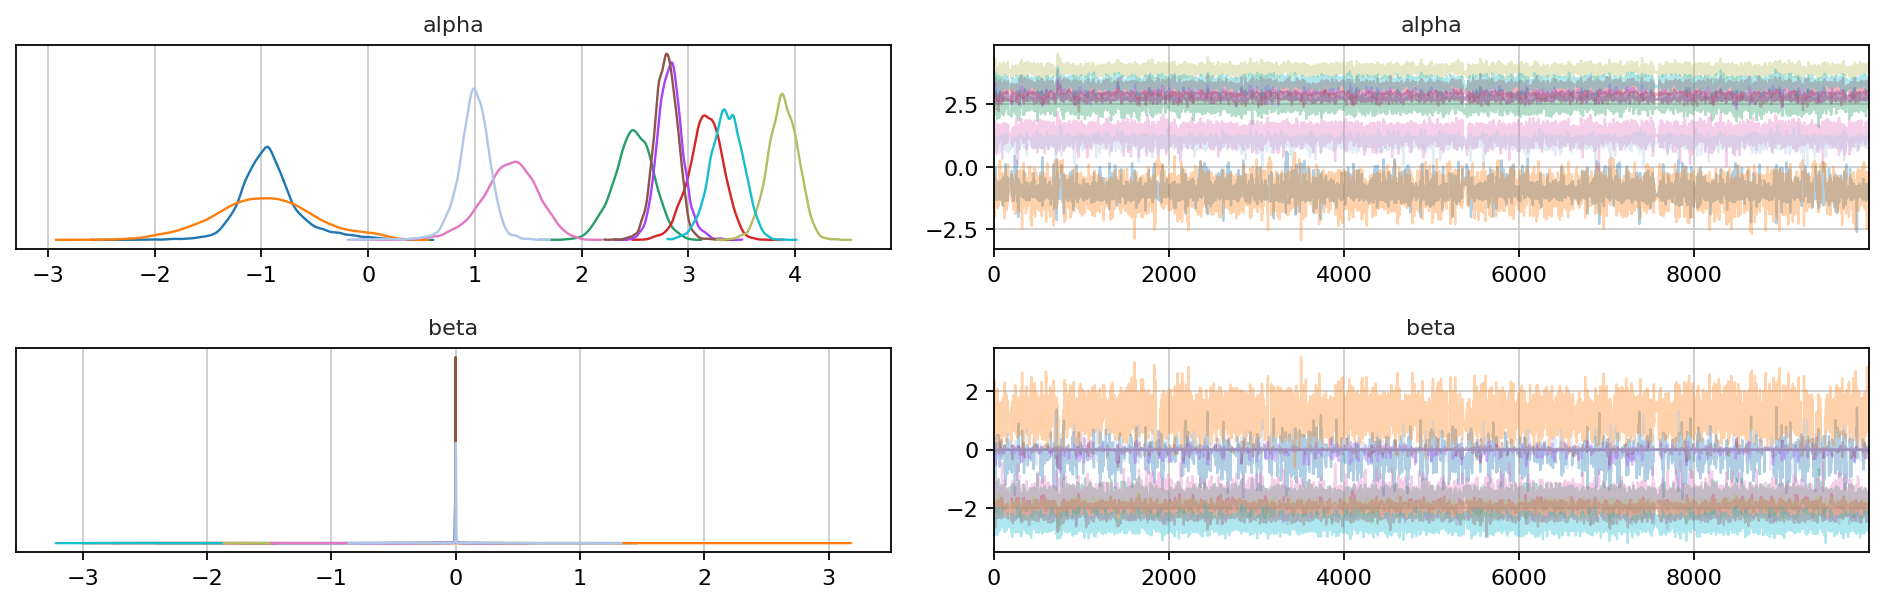

In [50]:
"""
    注意：由于spike-and-slab先验，beta参数在0处有许多值，这看起来像是收敛问题，但实际上并非如此。
"""
az.plot_trace(
    salm_arviz,
    divergences=False,
    var_names=["alpha", "beta"],
    coords={"cell_type": salm_arviz.posterior.coords["cell_type_nb"]},
)
plt.tight_layout()
plt.show()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

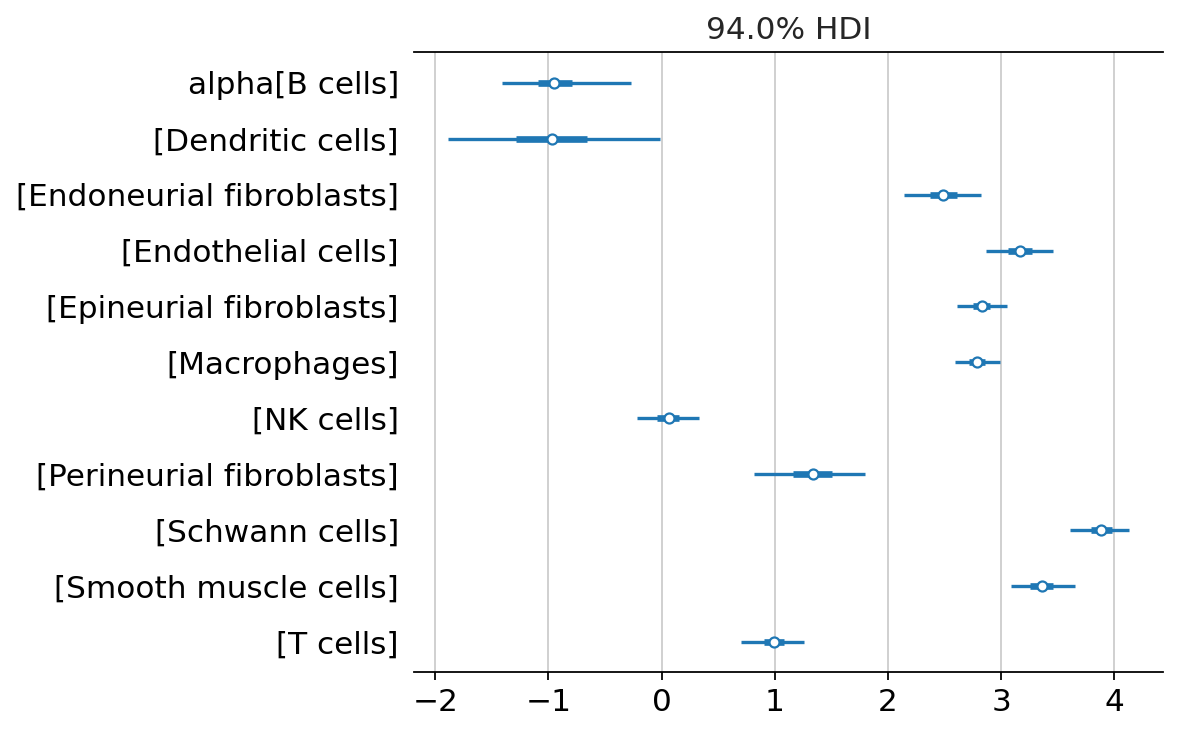

In [52]:
az.plot_forest(
    salm_arviz,
    var_names=["alpha"],
)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

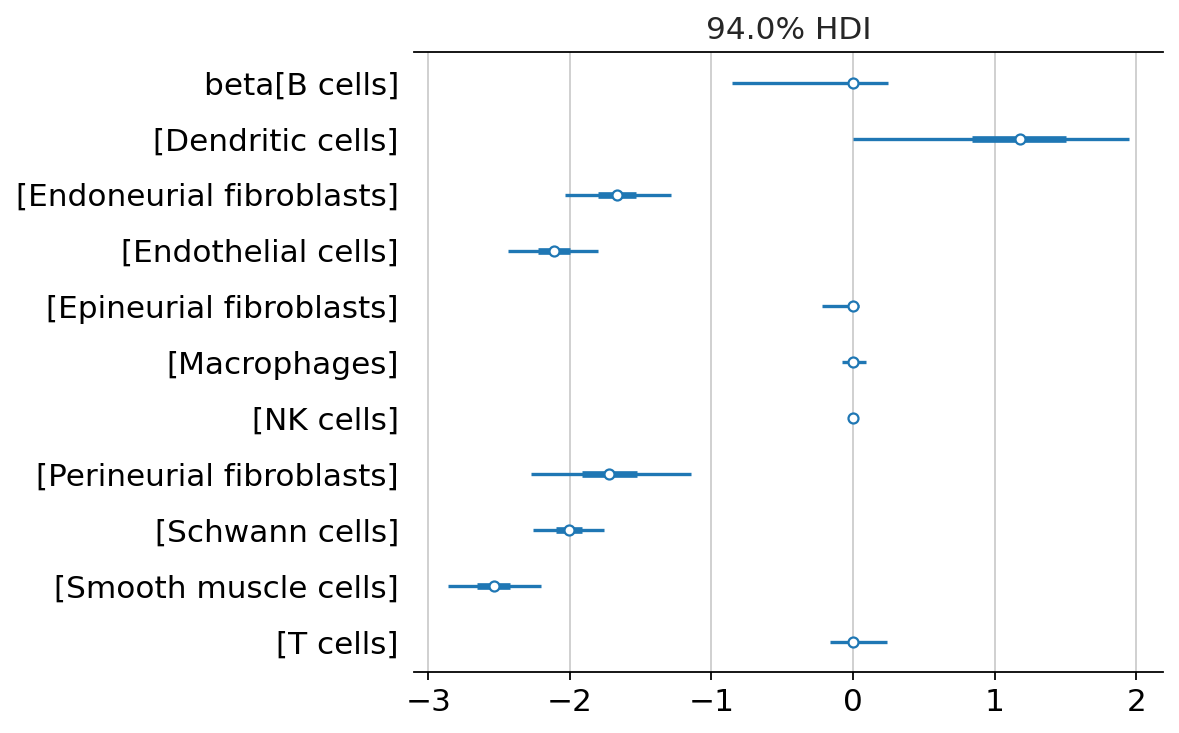

In [54]:
az.plot_forest(
    salm_arviz,
    var_names=["beta"],
)